# #1 Simple Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/anniezhu/VSCode/insurance_analysis_project/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


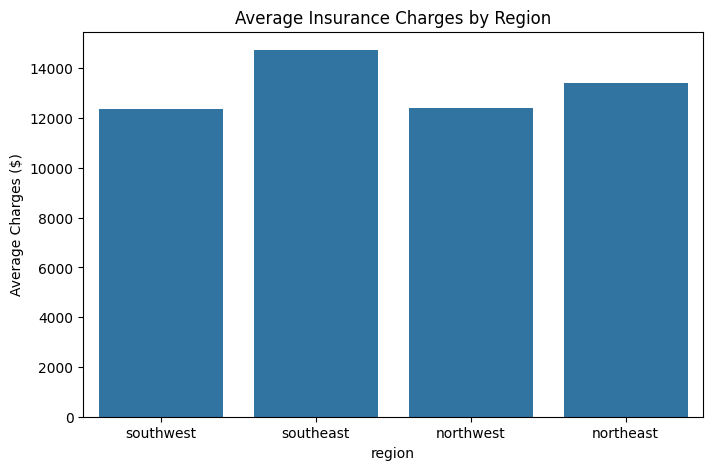

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='region', y ='charges', errorbar=None, estimator='mean')
plt.title("Average Insurance Charges by Region")
plt.ylabel("Average Charges ($)")
plt.show()

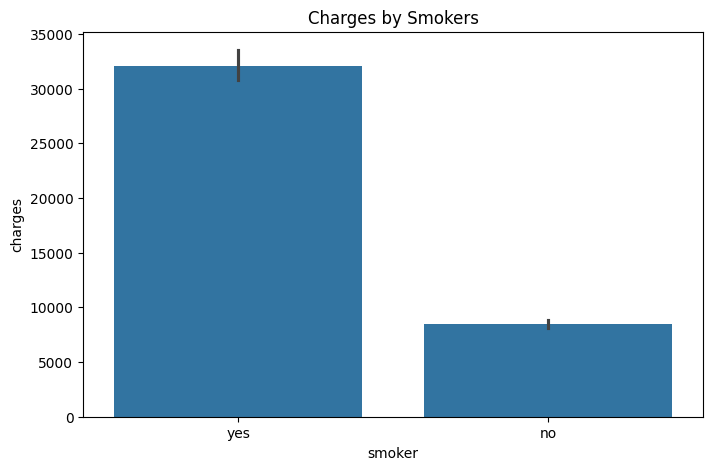

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='smoker', y ='charges')
plt.title("Charges by Smokers")
plt.show()

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Variable: **charges**, mean = 13270.422265, std = 12110.011237

The average insurance charge is approximately $13,270, with a standard deviation of $12,110, indicating substantial variation and suggesting the presence of **outliers**.

Variable: **age**, mean = 39.21, std = 14.049960

The average age is 39 years old and standard devarition is approximately 14 shows the spread might be reasonable. Range 18 - 64.

Variable: **bmi**, mean = 30.663397, std = 6.098187

The average bmi is 30.66 and standard devarition is approximately 6.1, indicating many overweight individuals (BMI > 30)


In [13]:
df.groupby("smoker")["charges"].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


**Smokers** average charge(mean) is approximately $32050.24

**Non-Smokers** average charge(mean) is approximately $8434.27

This reveals a large difference in mean charges, as well as in variability and maximum values, between **smokers** and **non-smokers**, implying that smoking status may be a major factor in insurance costs.


In [23]:
df[["age", "bmi", "charges"]].corr() #pairwise correlation between columns

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


Correlation between age and charges is 0.3 shows a weak positive correlation

Correlation between bmi and charges is 0.2 shows a very weak positive correlation

Correlation between age and bmi is 0.11 shows a positively correlation but not strongly.

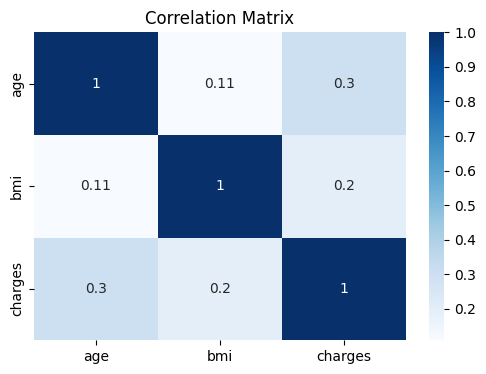

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["age", "bmi", "charges"]].corr(), annot = True, cmap= "Blues")
plt.title("Correlation Matrix")
plt.show()

# #2 Two-sample Independent Hypothesis Test

### 1. Define the population parameter of interest
The parameter of interest is the difference between the population means of the charges to smokers and non-smokers:

$\mu_{Smokers}$ - $\mu_{Non-Smokers}$

Where

$\mu_{Smokers}$: population mean of the charges to smokers

$\mu_{Non-Smokers}$: population mean of the charges to non-smokers



## 2. State the Hypotheses

$\text{H}_0$: $\mu_{Smokers}$ - $\mu_{Non-Smokers}$ = 0

$\text{H}_\alpha$: $\mu_{Smokers}$ - $\mu_{Non-Smokers}$ $\neq$ 0

In [34]:
from scipy import stats
import numpy as np

charges_smoker = df[df['smoker'] == 'yes']['charges']
charges_nonsmoker = df[df['smoker'] == 'no']['charges']

t_stat, p_value = stats.ttest_ind(charges_smoker, charges_nonsmoker, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.7f}")
# T-statistic: 32.75, P-value: 0.0000000

n1,n2 = len(charges_smoker), len(charges_nonsmoker)
s1,s2 = np.var(charges_smoker), np.var(charges_nonsmoker)

df_denominator = (s1/n1 + s2/n2)**2
df_numerator = ((s1/n1)**2)/(n1-1) + ((s2/n2)**2)/(n2-1)
degree_of_freedom = df_denominator/df_numerator
print(f"Degrees of Freedom (Welch's approximation): {degree_of_freedom:.5f}")

# Give 95% condidence level (two-tailed)
mean_difference = charges_smoker.mean() - charges_nonsmoker.mean()
alpha = 0.05
t_critical = stats.t.ppf(1-alpha/2, degree_of_freedom)
ci_low = mean_difference - t_critical * np.sqrt(s1/n1 + s2/n2)
ci_high = mean_difference + t_critical * np.sqrt(s1/n1 + s2/n2)
print(f"T-critical (two-tailed, df={degree_of_freedom:.5f}): {t_critical:.5f}")
print(f"95% Confidence Interval: ({ci_low:.5f}, {ci_high:.5f})")



T-statistic: 32.7519, P-value: 0.0000000
Degrees of Freedom (Welch's approximation): 311.95919
T-critical (two-tailed, df=311.95919): 1.96760
95% Confidence Interval: (22199.68072, 25032.24635)


## 3.Test Statistic

t = 32.7519, p-value = 0.0000, degress of freedom = 311.95919

t critical value = 1.96760, 95% CI:(22199.68072, 25032.24635)

## 4. Conclusion
As the p-value = 0.0000... is less than the significane level $\alpha$ = 0.05, we reject the null hypothesis


The data provides strong statistical evidence (p-value < 0.00001, df ≈ 312) to conclude that the average insurance charges differ significantly between smokers and non-smokers.


## 95% CI Interpretation
We are 95% confident that the true mean difference in charges between smokers and non-smokers lies between $22,200 and $25,032. Since the confidence interval does not contain 0, we reject the null hypothesis. Additionally, the calculated test statistic (t = 32.75) greatly exceeds the critical value (t = 1.97), further supporting the rejection of the null.

In [21]:
import statsmodels.api as sm

X = df[["age", "bmi"]]  
X = sm.add_constant(X)  
y = df["charges"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           7.39e-37
Time:                        12:46:13   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6424.8046   1744.091     -3.684      0.0